## **Mount to Drive and get the dataset**

In [ ]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/DatasetSnapZoo.zip'

# Path tujuan ekstraksi
extract_path = '/content/'

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verifikasi hasil ekstraksi
extracted_files = zipfile.ZipFile(zip_path, 'r').namelist()

print("File berhasil diekstrak ke:", extract_path)
print("Isi folder yang diekstrak:", extracted_files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File berhasil diekstrak ke: /content/
Isi folder yang diekstrak: ['Image Dataset/test/zebra/jxbhxbhbhb.jpg', 'Image Dataset/test/gajah/84hfuhhd.jpg', 'Image Dataset/test/zebra/nhsvsgvs.jpg', 'Image Dataset/test/gajah/ayutthaya-thailand-people-riding-elephant-17775222.jpg', 'Image Dataset/test/gajah/African-Elephant.jpg', 'Image Dataset/test/gajah/1.gajah-afrika.jpg', 'Image Dataset/test/gajah/894j8jjg.jpg', 'Image Dataset/test/gajah/9b6ec0f67f99eb2c.jpg', 'Image Dataset/test/gajah/034239400_1540813522-gajah.jpg', 'Image Dataset/test/gajah/8e5bcba4482105b2.jpg', 'Image Dataset/test/gajah/0ba8f4463ed0513f.jpg', 'Image Dataset/test/gajah/74u585h.jpg', 'Image Dataset/test/gajah/01f2b970acfd84791f4928e28a86b78f359196d6193e62000dd8ae681b9f2e1a.jpg', 'Image Dataset/test/gajah/463177414.jpg', 'Image Dataset/test/gajah/49jgnbfhb.jpg', 'Image Dataset/test/gajah/african

In [ ]:
dataset_dir = '/content/Image Dataset/'
!ls '/content/Image Dataset/'

test  train  validation


In [ ]:
train_dir = os.path.join(dataset_dir, 'train/')
test_dir = os.path.join(dataset_dir, 'test/')
validation_dir = os.path.join(dataset_dir, 'validation/')

## **Imports library**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random

## **Cek Isi Dataset dari folder**

**Menampilkan informasi isi dari folder test dan validation**

In [ ]:
class_names = ['badak', 'gajah', 'harimau', 'jerapah', 'monyet', 'penguin', 'rusa', 'singa', 'ular', 'zebra']

# Cek jumlah gambar untuk setiap kelas
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"Total training {class_name} images: {num_images}")
    class_dir = os.path.join(validation_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"Total validation {class_name} images: {num_images}")

    class_files = os.listdir(class_dir)
    print(class_files[:10])

    print()  # Tambahkan baris kosong antara setiap kelas


Total training badak images: 200
Total validation badak images: 30
['854bd727f9.jpg', '490eac2bee.jpg', '9fc92e91c2.jpg', 'badak 2.jpg', 'badak-ilustrasi-_120625133823-496.jpg', 'Badak_Sumatera.jpg', 'gambar-badak-www.binatang.mewarnaigambar.web.id.jpg', 'badak-jawa-_140122101026-372.jpg', 'o-img-46678-badak.jpg', 'badak_sumatra_save_the_rhino_3.JPG']

Total training gajah images: 200
Total validation gajah images: 30
['Elephant_013.jpg', 'asian-elephant-goldy-rajiv-santhoji.jpg', 'asian_elephant.jpg', '84y7733.jpg', 'Elephant-8-W14Q0MP69M-1024x768.jpg', 'elephant_1.jpg', 'g3.jpg', '48fe954ed2.jpg', 'foto-kelahiran-anak-gajah-sumatera48_700.jpg', 'foto-gajah-berwarna.jpg']

Total training harimau images: 200
Total validation harimau images: 30
['Amazing_Set_of_Wild_Cats_Wallpapers__2849_29.jpg', '2020-08-22_Harimau-Jawa-696x464.jpg', '082607200_1583834729-20200309-Bayi-Harimau-Putih-Langka-Lahir-di-Prancis-AFP-2.jpg', '928842_720.jpg', '20160729174640-1-ilustrasi-harimau-001-debby-rest

**Menampilkan 3 gambar data train dari setiap class**

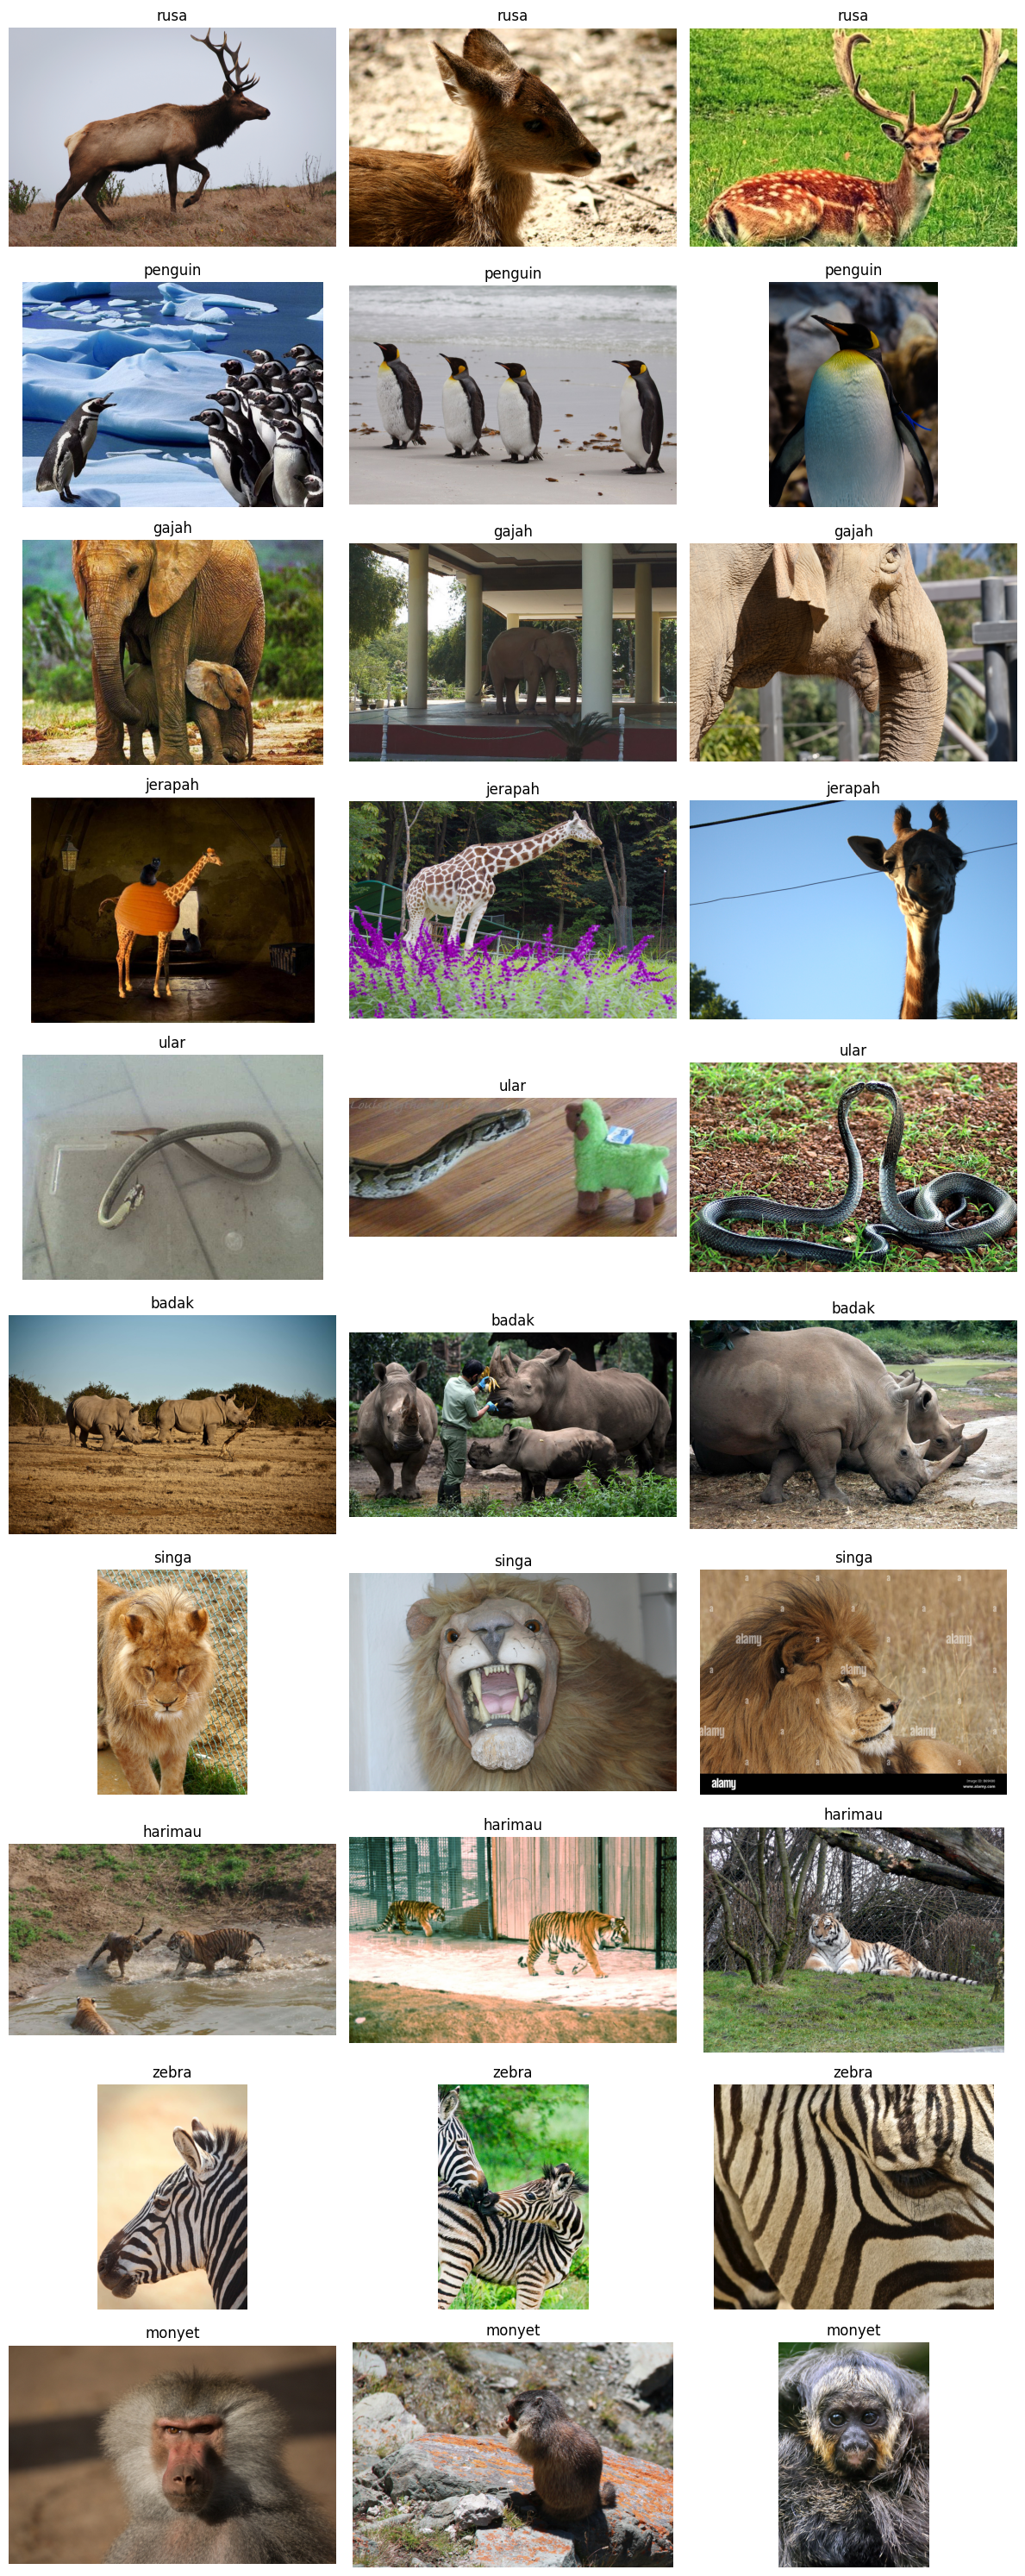

In [ ]:

# List nama kelas
class_names = ['badak', 'gajah', 'harimau', 'jerapah', 'monyet', 'penguin', 'rusa', 'singa', 'ular', 'zebra']

# Menampilkan 3 gambar secara acak dari setiap kelas dengan nama kelasnya
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 30))
plt.subplots_adjust(hspace=0.2, wspace=0.1)  # Mengatur jarak antara gambar

for i, class_name in enumerate(random.sample(class_names, 10)):
    # List path gambar pada kelas yang dipilih
    image_paths = os.listdir(os.path.join(train_dir, class_name))
    # Memilih 3 gambar secara acak dari kelas yang dipilih
    image_paths = random.sample(image_paths, min(3, len(image_paths)))
    for j, image_path in enumerate(image_paths):
        img = image.load_img(os.path.join(train_dir, class_name, image_path))
        axes[i, j].imshow(img)
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


## **Preprocessing**

In [ ]:
# Mengatur parameter untuk training
num_classes = 10
batch_size = 32
epochs = 20

In [ ]:
# Mempersiapkan data train dan validasi dengan augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2000 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


## **Make & train the model**

In [ ]:
# Memuat model InceptionV3 tanpa bagian kepala
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Membekukan lapisan base model agar tidak ikut dilatih
for layer in base_model.layers:
    layer.trainable = False

**Create final model**

In [ ]:
# Menambahkan lapisan kepala baru
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Mengompilasi model
model.compile(optimizer='adam', loss='kullback_leibler_divergence', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

**Create Callback**

In [ ]:
class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 or logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy has reached > 99%!")
callbacks = myCallback()

**Train the Model**

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=valid_generator,
                    validation_steps=valid_generator.samples // batch_size,
                    callbacks = [callbacks]
)

Epoch 1/20
62/62 [==============================] - 676s 11s/step - loss: 0.4377 - accuracy: 0.8735 - val_loss: 0.0777 - val_accuracy: 0.9722
Epoch 2/20
62/62 [==============================] - 733s 12s/step - loss: 0.1706 - accuracy: 0.9512 - val_loss: 0.0908 - val_accuracy: 0.9757
Epoch 3/20
62/62 [==============================] - 730s 12s/step - loss: 0.1301 - accuracy: 0.9639 - val_loss: 0.0460 - val_accuracy: 0.9861
Epoch 4/20
62/62 [==============================] - 669s 11s/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0643 - val_accuracy: 0.9792
Epoch 5/20
62/62 [==============================] - 663s 11s/step - loss: 0.0839 - accuracy: 0.9741 - val_loss: 0.0521 - val_accuracy: 0.9861
Epoch 6/20
62/62 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9792
The accuracy has reached > 99%!
62/62 [==============================] - 669s 11s/step - loss: 0.0615 - accuracy: 0.9792 - val_loss: 0.0419 - val_accuracy: 0.9931


## **Plot the Accuracy and loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


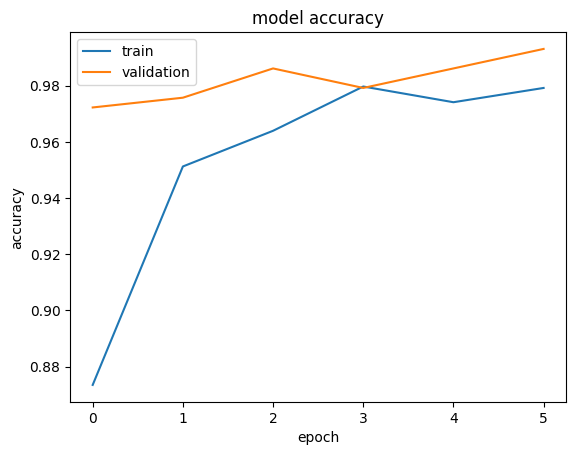

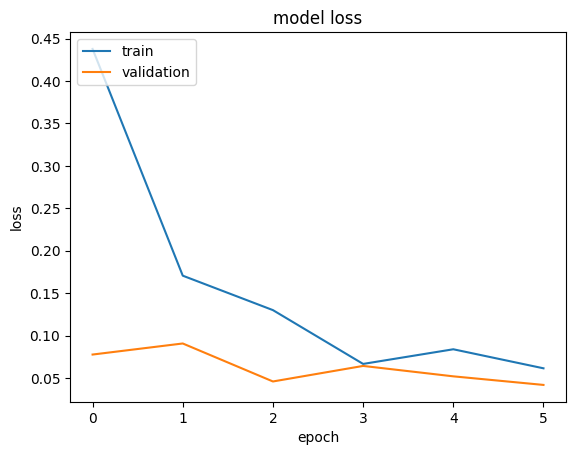

In [ ]:
print(history.history.keys())
# Menampilkan history dari akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Menampilkan history dari Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## **Test the model**

**using test dataset folder**

In [ ]:
correct_predictions = 0
total_predictions = 0

# Mengambil 5 file acak dari setiap kelas
num_samples_per_class = 5

for class_name in class_names:
    #pake folder test
    class_dir = os.path.join(test_dir, class_name)
    file_names = os.listdir(class_dir)
    random.shuffle(file_names)
    selected_files = file_names[:num_samples_per_class]

    for file_name in selected_files:
        file_path = os.path.join(class_dir, file_name)

        # Membaca dan menampilkan gambar
        img = mpimg.imread(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Melakukan prediksi menggunakan model
        img = image.load_img(file_path, target_size=(299, 299))
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions[0])
        predicted_class = class_names[predicted_class_index]
        probability = predictions[0][predicted_class_index]

        print("Prediksi: ", predicted_class)
        print("Probabilitas: ", probability)
        print("Nama kelas: ", class_name)

        # Menentukan apakah prediksi benar atau salah
        is_correct_prediction = predicted_class == class_name

        if is_correct_prediction:
            print("Prediksi Benar")
            correct_predictions += 1
        else:
            print("Prediksi Salah")
        print("--------------------------------------")

        total_predictions += 1

# Menampilkan statistik akurasi
accuracy = correct_predictions / total_predictions
print("Akurasi: ", accuracy)


**Plot the result from test the model using test dataset**

1/1 [==============================] - 0s 252ms/step


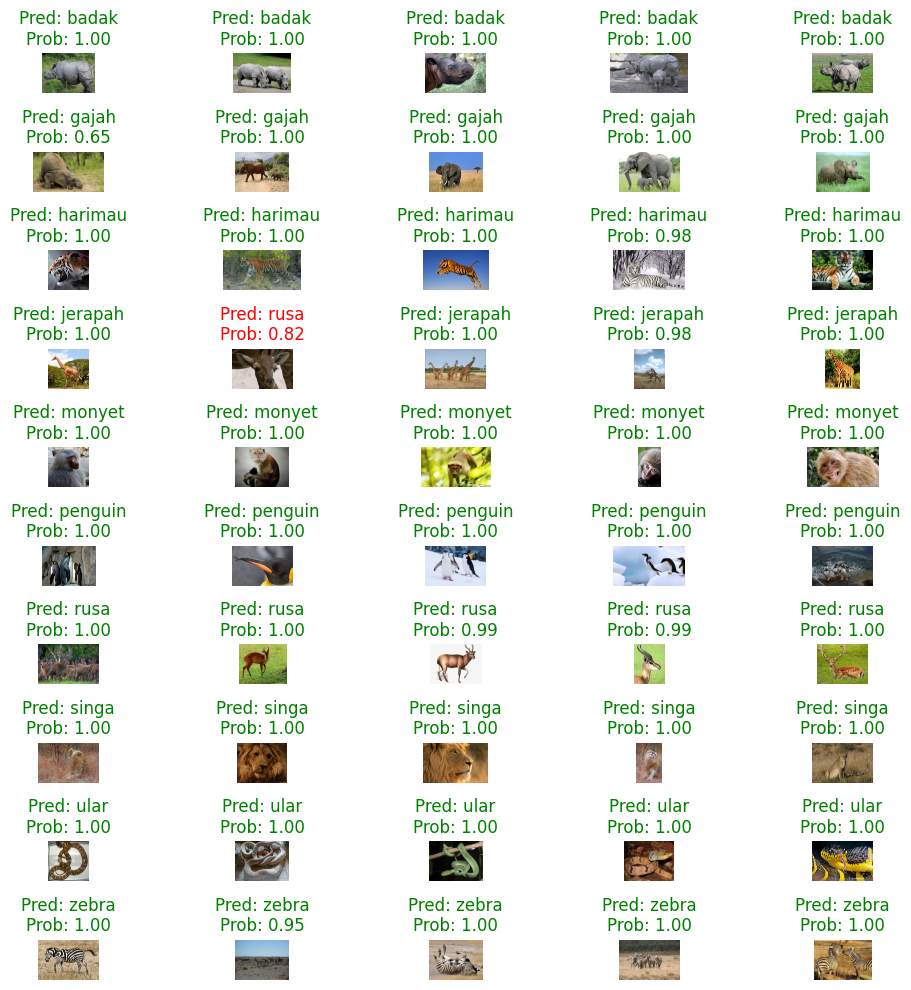

Akurasi:  0.98


In [ ]:
correct_predictions = 0
total_predictions = 0
fig, axs = plt.subplots(nrows=len(class_names), ncols=num_samples_per_class, figsize=(10, 10))

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(test_dir, class_name)
    file_names = os.listdir(class_dir)
    random.shuffle(file_names)
    selected_files = file_names[:num_samples_per_class]

    for j, file_name in enumerate(selected_files):
        file_path = os.path.join(class_dir, file_name)

        # Membaca dan menampilkan gambar
        img = mpimg.imread(file_path)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')

        # Melakukan prediksi menggunakan model
        img = image.load_img(file_path, target_size=(299, 299))
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions[0])
        predicted_class = class_names[predicted_class_index]
        probability = predictions[0][predicted_class_index]

        axs[i, j].set_title(f'Pred: {predicted_class}\nProb: {probability:.2f}', color='green' if predicted_class == class_name else 'red')

        # Menentukan apakah prediksi benar atau salah
        is_correct_prediction = predicted_class == class_name

        if is_correct_prediction:
            correct_predictions += 1

        total_predictions += 1

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Menampilkan statistik akurasi
accuracy = correct_predictions / total_predictions
print("Akurasi: ", accuracy)


**Test the model using upload some image**

Saving tess3.jpeg to tess3.jpeg
Saving tess2.jpeg to tess2.jpeg
Saving tess1.jpeg to tess1.jpeg
1/1 [==============================] - 0s 94ms/step


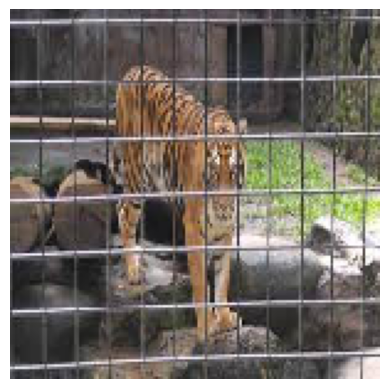

File: tess3.jpeg
Predicted class: harimau
Probability: 1.0

1/1 [==============================] - 0s 79ms/step


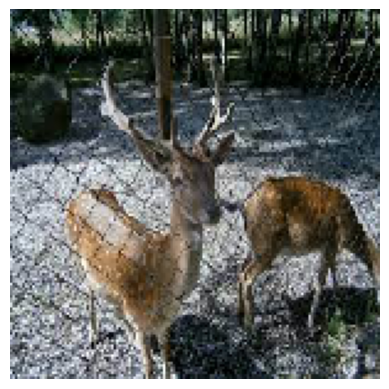

File: tess2.jpeg
Predicted class: rusa
Probability: 1.0

1/1 [==============================] - 0s 91ms/step


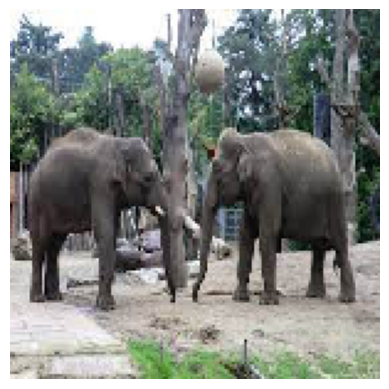

File: tess1.jpeg
Predicted class: gajah
Probability: 1.0



In [ ]:
# Mengupload gambar-gambar
uploaded_files = files.upload()

# Inisialisasi list untuk menyimpan hasil prediksi
predictions = []

# Looping untuk setiap file gambar yang diupload
for image_path in uploaded_files.keys():
    # Load gambar dan lakukan preprocessing
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Prediksi kelas gambar
    predictions = model.predict(img_array)

    # Dictionary untuk mapping indeks kelas ke nama kelas
    class_names = train_generator.class_indices

    # Mengambil indeks kelas dengan nilai probabilitas tertinggi
    predicted_class_index = np.argmax(predictions)

    # Mengambil nama kelas yang terkait dengan prediksi
    predicted_class = [k for k, v in class_names.items() if v == predicted_class_index][0]

    # Mengambil nilai probabilitas tertinggi
    predicted_prob = np.max(predictions)

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Menampilkan nama file, prediksi kelas, dan nilai probabilitas
    print('File:', image_path)
    print('Predicted class:', predicted_class)
    print('Probability:', predicted_prob)
    print()

## **Save Model**

In [ ]:
# Menyimpan model ke Google Drive
model_save_path = '/content/drive/MyDrive/ModelInceptionSnapZoo.h5'
model.save(model_save_path)
print("Model telah disimpan di:", model_save_path)

Model telah disimpan di: /content/drive/MyDrive/ModelInceptionSnapZoo.h5


**Convert h5 ke tflite**

In [ ]:
# Konversi ke format TFLite dengan kompresi
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Simpan model TFLite ke Google Drive
tflite_model_save_path = '/content/drive/MyDrive/ModelInceptionSnapZoo.tflite'
with open(tflite_model_save_path, 'wb') as f:
    f.write(tflite_model)

print("Model TFLite telah disimpan di:", tflite_model_save_path)

Model TFLite telah disimpan di: /content/drive/MyDrive/ModelInceptionSnapZoo.tflite
